### - Importation des bibliothèques necessaires

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import pandas as pd

### Problème de classification d'images : Reseau de neurone convolutionnel (CNN)
* On veut classer les 60000 images de l'ensemble de donnée CIFAR-10 en ces 10 classes.
* **Formulation mathematique du problème** : 
    * On part de l'equation d'un problème de classification en machine learning  
                                        a(x) = b + w*x = b + sommei(wixi)
    * Où les xi sont les paramètre à chercher.
    * Sur cette equation on applique une fonction d'activation g(x):
                                        h(x) = g(a(x)) = g(b + sommei(wixi))
* Le reseau se compose de cette fonction d'activation au niveau de chaque neurone.

### - Importation du dataset

* L'ensemble de données **CIFAR-10** se compose de **60 000 images couleur 32x32** réparties en **10 classes**, avec **6 000 images par classe**. Il y a **50 000 images d'entraînement** et **10 000 images de test**.

In [2]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Forme de x_train {}'.format(x_train.shape))
print('Forme de x_test {}'.format(x_test.shape)) 
print('Forme de y_train {}'.format(y_train.shape))
print('Forme de y_test {}'.format(y_test.shape))

Forme de x_train (50000, 32, 32, 3)
Forme de x_test (10000, 32, 32, 3)
Forme de y_train (50000, 1)
Forme de y_test (10000, 1)


#### - Normalisation et encodage

In [3]:
# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

## Solution au problème :
* A l'entrée du reseau on connecte chacune des observations à chaque noeud du reseau, de manière successive chaque noeud seront interconnecté jusqu'à la sortie du reseau.
* A la sortie du reseau on a une couche de sortie qui fait une prediction de 10 classes.
* Par la suite la prediction faite sera comparé à la variable réelle tout en mesurant l'erreur entre les deux d'où la fonction de perte :
                            E(y_true, y_predict) = (1/2*m)*sommei(||y_truei - y_predicti^||^2).
* Sur cette fonction de perte on applique le gradiant qui calcul les paramètres optimaux pouvant minimiser l'erreur.
                                            Pk+1 = Pk − αk .grad f (Pk )
* Où Pk sont les paramètres à optimiser, αk est taux d'apprentissage et m un paramètre de regularisation.
* En fin ces paramètres seront appliqués au reseau.

## Modèle de base
* Commençons avec 2 couches CNN de base, où chaque couche est attachée à une couche maxpool. La mise en commun maximale est un excellent moyen de réduire la taille des paramètres sans perdre beaucoup d'informations. Comme d'habitude dans tout modèle d'apprentissage en profondeur, nous devons aplatir les résultats des couches intermédiaires et les transmettre à un réseau dense. Ensuite, le résultat du réseau dense sera transmis à une couche de sortie finale où le nombre d'unités représente le nombre de catégories dans les données, soit 10 dans notre cas. Softmax est choisi comme activation finale car nous avons besoin de la classe probable la plus élevée sur 10.
* Enfin, compilons notre modèle avec une fonction de perte d'entropie croisée catégorique, un optimisuer Adam et un metric accuracy.
* **MaxPool2D** : Opération de regroupement maximum pour les données spatiales 2D.
* **pool_size** : entier ou tuple de 2 entiers, taille de fenêtre sur laquelle prendre le maximum. 

In [4]:
model1=Sequential() # Création du model sequentiel
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu')) # Couche convolutive d'entée avec des images 32x32 codée sur un vecteurs de dim 3
model1.add(MaxPool2D(pool_size=(2,2))) # Couche de regroupement
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten()) # Couche qui aplatis les données 2d en entrées en une sortie 1d 
model1.add(Dense(256,activation='relu')) # Couche dense dont tous ces neuronnes sont entièrement connectés à la sortie de la couche précédente
model1.add(Dense(10,activation='softmax')) # Couche de sortie avec un foncton d'activation softmax
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

#### - Entrainement du modèle

In [6]:
history1=model1.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 109s 56ms/step - loss: 1.4867 - accuracy: 0.4628 - val_loss: 1.2432 - val_accuracy: 0.5543
Epoch 2/20
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1642 - accuracy: 0.5901 - val_loss: 1.1192 - val_accuracy: 0.6009
Epoch 3/20
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0250 - accuracy: 0.6412 - val_loss: 1.0203 - val_accuracy: 0.6425
Epoch 4/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9168 - accuracy: 0.6789 - val_loss: 1.0159 - val_accuracy: 0.6505
Epoch 5/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8273 - accuracy: 0.7092 - val_loss: 0.9955 - val_accuracy: 0.6569
Epoch 6/20
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7454 - accuracy: 0.7402 - val_loss: 0.9762 - val_accuracy: 0.6682
Epoch 7/20
1563/1563 [==============================] - 76s 48ms/step - loss: 0.6729 - accuracy: 0.7636 - val_loss: 1.1204 

#### - Evaluation du modèle

In [7]:
evaluation = model1.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 6s 17ms/step - loss: 1.9373 - accuracy: 0.6605
Test Accuracy: 0.6604999899864197


<AxesSubplot:>

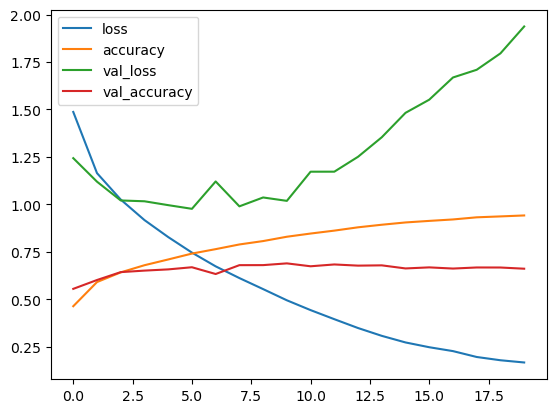

In [8]:
pd.DataFrame(history1.history).plot()

En utilisant notre modèle de base, on observe une précision d'entraînement de 88 % et une précision de test de 65 %, ce qui n'est pas si génial, mais nous utilisons toujours un modèle très simple. Nous pouvons effectuer de nombreux ajustements pour obtenir une assez bonne précision. Si vous observez le journal d'entraînement du modèle ci-dessus, vous pouvez voir que la perte de validation augmente beaucoup, ce qui signifie que notre modèle est surajusté.

Le surajustement signifie que notre modèle fonctionne bien sur l'ensemble de données d'apprentissage, mais ne parvient pas à généraliser sur les données invisibles. Essayons de réduire le surajustement.

On pourrais reduire le surajustement en appliquant la regularisation.

Dans l'apprentissage en profondeur, **Dropout** est une méthode de régularisation qui se rapproche de la formation d'un grand nombre de réseaux de neurones avec différentes architectures en parallèle.

**Dropout** signifie littéralement que nous allons supprimer certaines des unités neuronales au hasard de notre réseau, ce qui oblige la couche suivante à réapprendre les modèles. De cette façon, notre modèle deviendra plus robuste et se généralise bien. 

## Model 2 : Ajout de Drop out

In [9]:
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25)) # 25% des sorties de neuronnes seront mises à zéro.
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25)) # 25% des sorties de neuronnes seront mises à zéro.
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history2=model2.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 106s 65ms/step - loss: 1.5527 - accuracy: 0.4362 - val_loss: 1.2801 - val_accuracy: 0.5415
Epoch 2/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.2708 - accuracy: 0.5496 - val_loss: 1.1479 - val_accuracy: 0.5958
Epoch 3/20
1563/1563 [==============================] - 113s 72ms/step - loss: 1.1395 - accuracy: 0.5975 - val_loss: 1.0656 - val_accuracy: 0.6204
Epoch 4/20
1563/1563 [==============================] - 102s 65ms/step - loss: 1.0558 - accuracy: 0.6267 - val_loss: 0.9665 - val_accuracy: 0.6648
Epoch 5/20
1563/1563 [==============================] - 90s 58ms/step - loss: 0.9832 - accuracy: 0.6531 - val_loss: 0.9429 - val_accuracy: 0.6744
Epoch 6/20
1563/1563 [==============================] - 94s 60ms/step - loss: 0.9294 - accuracy: 0.6740 - val_loss: 0.9092 - val_accuracy: 0.6812
Epoch 7/20
1563/1563 [==============================] - 97s 62ms/step - loss: 0.8807 - accuracy: 0.6910 - val_loss: 0.929

In [10]:
evaluation = model2.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 7s 22ms/step - loss: 0.8861 - accuracy: 0.7106
Test Accuracy: 0.7106000185012817


<AxesSubplot:>

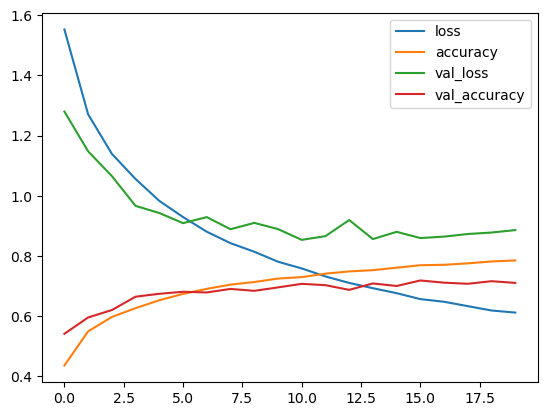

In [11]:
pd.DataFrame(history2.history).plot()

L'ajout des couches Dropout entraîne une amélioration de la précision sur les données de validation de 65 à 71 %.

## Model 3 : Ajout de plus de couche avec plus de filtres.

In [12]:
# model3 = Sequential()
# model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
# model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
# model3.add(MaxPool2D(2,2))
# model3.add(Dropout(0.4))


# model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
# model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
# model3.add(MaxPool2D(2,2))
# model3.add(Dropout(0.4))

# model3.add(Flatten())

# model3.add(Dense(units = 1024, activation = 'relu'))

# model3.add(Dense(units = 1024, activation = 'relu'))

# model3.add(Dense(units = 10, activation = 'softmax'))
# model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# history3=model3.fit(x_train,y_train_cat,epochs=40,validation_data=(x_test,y_test_cat)) # Train for more number of epochs

Epoch 1/50
1563/1563 [==============================] - 957s 611ms/step - loss: 1.7904 - accuracy: 0.3314 - val_loss: 1.4317 - val_accuracy: 0.4717
Epoch 2/50
1563/1563 [==============================] - 934s 597ms/step - loss: 1.3445 - accuracy: 0.5132 - val_loss: 1.2177 - val_accuracy: 0.5569
Epoch 3/50
1563/1563 [==============================] - 890s 569ms/step - loss: 1.1554 - accuracy: 0.5864 - val_loss: 0.9888 - val_accuracy: 0.6433
Epoch 4/50
1563/1563 [==============================] - 982s 628ms/step - loss: 1.0185 - accuracy: 0.6388 - val_loss: 0.9222 - val_accuracy: 0.6704
Epoch 5/50
1563/1563 [==============================] - 1296s 830ms/step - loss: 0.9336 - accuracy: 0.6699 - val_loss: 0.8911 - val_accuracy: 0.6886
Epoch 6/50
1563/1563 [==============================] - 1272s 814ms/step - loss: 0.8722 - accuracy: 0.6914 - val_loss: 0.8329 - val_accuracy: 0.7097
Epoch 7/50
1563/1563 [==============================] - 2816s 2s/step - loss: 0.8212 - accuracy: 0.7095 - val_


KeyboardInterrupt



In [ ]:
evaluation = model3.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

In [ ]:
pd.DataFrame(history3.history).plot()